In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [30]:
df0 = pd.read_csv(r'C:\Users\Dikla\Desktop\fashion-mnist_train.csv')

In [31]:
df0.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_test = pd.read_csv(r'C:\Users\Dikla\Desktop\fashion-mnist_test.csv')

In [33]:
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
X1 = df_test.drop(['label'],axis = 1)
y1 = df_test.label

In [35]:
X0 = df0.drop(['label'],axis = 1).values

In [36]:
image = X0[20]

In [37]:
image = image.reshape(28,28)

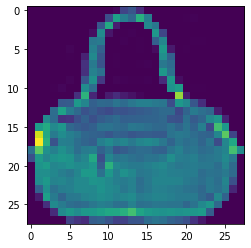

In [38]:
plt.imshow(image)

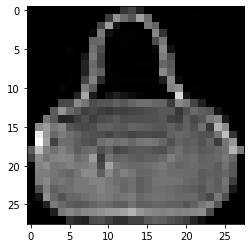

In [39]:
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [40]:
df1 = df0.drop_duplicates()
df1

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df0.isna().sum().sum()

0

In [42]:
X = df1.drop(['label'],axis = 1)
y = df1.label

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [44]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
6545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32849,0,0,0,0,0,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
5226,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
51886,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
52903,0,0,0,1,0,0,0,0,0,39,...,0,3,0,0,175,200,208,150,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53310,0,0,0,0,0,0,0,0,0,0,...,103,56,0,4,0,0,0,0,0,0
5347,0,0,0,0,0,0,0,0,0,0,...,41,33,34,12,0,1,0,0,0,0
51254,0,0,0,0,0,0,0,10,10,14,...,25,0,9,8,0,0,0,0,0,0
870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,130,130,39,0,0,0


In [45]:
y.shape, y_train.shape, y_test.shape

((59957,), (47965,), (11992,))

In [46]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values))
X_test = pd.DataFrame(scaler.transform(X_test.values))
X_test_final = pd.DataFrame(scaler.transform(X1.values))

In [47]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum >= 0.95) + 1
print (d)

255


Text(0, 0.5, 'Explained Variance')

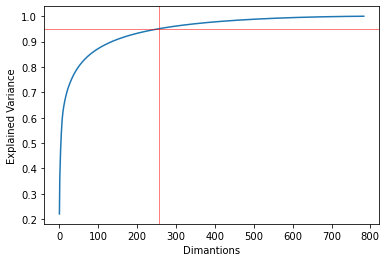

In [78]:
plt.plot(cumsum)
plt.axhline(y=0.95 , linewidth = 0.5 , color = 'r');
plt.axvline(x=d , linewidth = 0.5 , color = 'r');
plt.xlabel("Dimantions")
plt.ylabel("Explained Variance")

In [49]:
pca = PCA(n_components = 0.95)
X_train_reduced = pd.DataFrame(pca.fit_transform(X_train))
X_test_reduced = pd.DataFrame(pca.transform(X_test))
X_test_reduced_final = pd.DataFrame(pca.transform(X_test_final))

# Before PCA

In [50]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
knn_prediction = knn.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(accuracy_score(y_test,pred))

0.8535690460306872


In [53]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [54]:
from sklearn.metrics import accuracy_score
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test,pred))

0.587641761174116


In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
gnb = GaussianNB()
lr = LogisticRegression()

In [56]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('knn',knn),("RF",clf),('gaussian-bayes',gnb)])

In [57]:
from sklearn.metrics import accuracy_score
voting.fit(X_train,y_train)
pred = voting.predict(X_test)
print(accuracy_score(y_test,pred))

0.7023015343562375


In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
bag_clf = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = True , n_jobs = -1)
bag_clf.fit(X_train , y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7620913942628419


In [60]:
bag_clf1 = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = False , n_jobs = -1)
bag_clf1.fit(X_train , y_train)
y_pred = bag_clf1.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7631754503002002


In [61]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators = 1500,learning_rate = 0.05,use_label_encoder = False, eval_metric = "merror")

In [62]:
xgb_clf.fit(X_train,y_train)
pred = xgb_clf.predict(X_test)
print(accuracy_score(y_test,pred))

0.9083555703802535


In [63]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth = 1),n_estimators = 200,algorithm = "SAMME.R",learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
pred = ada_clf.predict(X_test)
print(accuracy_score(y_test,pred))

0.46080720480320214


# After PCA

In [64]:
knnpca = KNeighborsClassifier()
knnpca.fit(X_train_reduced,y_train)

KNeighborsClassifier()

In [65]:
from sklearn.metrics import accuracy_score
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(accuracy_score(y_test,pred))

0.8535690460306872


In [66]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_reduced, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [67]:
from sklearn.metrics import accuracy_score
clf.fit(X_train_reduced,y_train)
pred = clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

0.6845396931287525


In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
gnb = GaussianNB()
lr = LogisticRegression()

In [69]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('knn',knn),("RF",clf),('gaussian-bayes',gnb)])

In [70]:
from sklearn.metrics import accuracy_score
voting.fit(X_train_reduced,y_train)
pred = voting.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

0.7800200133422281


In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [72]:
bag_clf = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = True , n_jobs = -1)
bag_clf.fit(X_train_reduced , y_train)
y_pred = bag_clf.predict(X_test_reduced)
print(accuracy_score(y_test,y_pred))

0.7342394929953302


In [73]:
bag_clf1 = BaggingClassifier(DecisionTreeClassifier() , n_estimators = 500, max_samples = 100, bootstrap = False , n_jobs = -1)
bag_clf1.fit(X_train_reduced , y_train)
y_pred = bag_clf1.predict(X_test_reduced)
print(accuracy_score(y_test,y_pred))

0.7336557705136758


In [74]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators = 2000,learning_rate = 0.04,use_label_encoder = False, eval_metric = "merror")

In [75]:
xgb_clf.fit(X_train_reduced,y_train)
pred = xgb_clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

0.889342895263509


In [76]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth = 1),n_estimators = 200,algorithm = "SAMME.R",learning_rate = 0.5)
ada_clf.fit(X_train_reduced, y_train)
pred = ada_clf.predict(X_test_reduced)
print(accuracy_score(y_test,pred))

0.61974649766511


In [ ]:
# = AdaBoostClassifier( DecisionTreeClassifier(max_depth = 1),n_estimators = 200,algorithm = "SAMME.R",learning_rate = 0.5)
#ada_clf.fit(X_train_reduced, y_train)
#pred = ada_clf.predict(X_test_reduced_final)
#print(accuracy_score(y_test,pred))